# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Sarika Vishnukumar Patel - 403353
    2. Sonam Chugh - 403501
    3. Mohit Nikumbh - 403340

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
# Your code:
# Your code:
# Preprocessing of the Dataset 
'''
Step - 1 : Create a new dataset, 'population_density_modified.csv' that contains 90% random data
           of the original dataset 'population_density.csv'
'''
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from pylab import *
import statistics as st


df = pd.read_csv('population_density.csv')
modified_df = df.sample(frac=0.9,random_state=403340) #Extract 90% random data from orignal dataset
modified_df.to_csv('population_density_modified.csv',index=False) 

'''
Step - 2: To this modified file, we add a column named 'population_density_categorical' which 
          contains different values [very high, high, medium, low, very low] depending upon the (integer)
          value of the column 'population_density'. 
'''

df = pd.read_csv('population_density_modified.csv')
df['population_density_categorical'] = '' #Create an empty column 'population_density_categorical'
population_density_loc = df.columns.get_loc('population_density') #Get the index of column 'population_density'
population_density_categorical_loc = df.columns.get_loc('population_density_categorical') #Get the index of column 'population_density_categorical'
for i in range(len(df.index)): #Iterate through all the index of the dataframe 
    population_density = df.iloc[i,population_density_loc] #Get value of 'population_density' from each row
    if population_density >= 5824:
        df.iloc[i,population_density_categorical_loc] = 'very high'
    elif population_density >= 4368 and population_density < 5824 :
        df.iloc[i,population_density_categorical_loc] = 'high'
    elif population_density >= 2912 and population_density < 4368:
        df.iloc[i,population_density_categorical_loc] = 'medium'
    elif population_density >= 1456 and population_density < 2912:
        df.iloc[i,population_density_categorical_loc] = 'low'
    else:
        df.iloc[i,population_density_categorical_loc] = 'very low'
df.to_csv('population_density_categorical.csv',index=False)
print("Completed")



Completed


## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

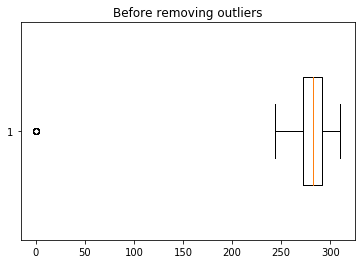

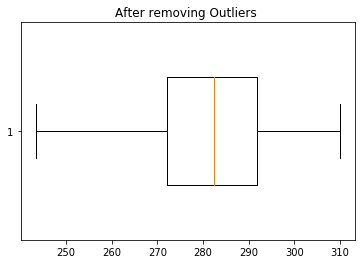

In [2]:
# Your code:
'''
Part - a: Creat a boxplot for the column 'temperature'. Find and remove the outliers. 
          Store new dataset as 'population_density_categorical_filtered.csv'
'''
df = pd.read_csv('population_density_categorical.csv')

Q1 = df['temperature'].quantile(0.25) 
Q3 = df['temperature'].quantile(0.75) 
IQR = Q3 - Q1 # Find the inter-quartile range

filter =((df['temperature'] >= Q1 - (1.5 * IQR)) & (df['temperature'] <= Q3 + (1.5 * IQR)))
filter_df = df.loc[filter]  # Filter the dataframe

# create new cleaned dataset after removing outliers
filter_df.to_csv('population_density_categorical_filter.csv',index=False) 
plt.boxplot(df['temperature'], vert=False,  widths=0.5) #To plot horizontal boxplots
plt.title("Before removing outliers")
plt.show()
plt.boxplot(filter_df['temperature'], vert=False,  widths=0.5 )
plt.title("After removing Outliers ")
plt.show()

   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [3]:
# Your code:

'''
Part - b: Find and print the difference in mean value, median value and mode value between the two dataset 
          'population_density_categorical.csv' and 'population_density_categorical_filtered.csv' 
'''

df = pd.read_csv('population_density_categorical.csv')
filtered_df = pd.read_csv('population_density_categorical_filter.csv')

# show the statistical features(median,mean and mode) of "temperature" in original dataset
print("Original Dataset:")
print("Median: ",np.median(df['temperature'])) 
print("Mean: ",np.mean(df['temperature']))
print("Mode: ",st.mode(df['temperature']),'\n')

# show the statistical features(median,mean and mode) of "temperature" in cleaned dataset
print("Filtered Dataset:")
print("Median: ",np.median(filtered_df['temperature']))
print("Mean: ",np.mean(filtered_df['temperature']))
print("Mode: ",st.mode(filtered_df['temperature']),'\n')

# show the difference of statistical features(median,mean and mode) of "temperature" 
print("Difference of mean: ",round(abs(st.mean(df['temperature'])-st.mean(filtered_df['temperature'])),3))
print("Difference of median: ",round(abs(st.median(df['temperature'])-st.median(filtered_df['temperature'])),3))
print("Difference of mode: ",abs(st.mode(df['temperature'])-st.mode(filtered_df['temperature'])))


Original Dataset:
Median:  282.43
Mean:  281.2014554444029
Mode:  274.15 

Filtered Dataset:
Median:  282.43
Mean:  281.2598027204605
Mode:  274.15 

Difference of mean:  0.058
Difference of median:  0.0
Difference of mode:  0.0


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [4]:
# Your code:
'''
Part - c: Compare and print the difference in number of rows in data 'population_density_categorical.csv' and 
          'population_density_categorical_filtered.csv'
'''
Total_rowsbefore = df.shape[0] # print the total number of rows before removing outliers
print("Number of row before removing the outliers: ",Total_rowsbefore)

Total_rowsafter = filter_df.shape[0] # print the total number of rows after removing outliers
print("Number of row after removing the outliers: ",Total_rowsafter)

Difference = Total_rowsbefore - Total_rowsafter # get total number of rows which were removed
print("Number of rows removed: ",Difference)


Number of row before removing the outliers:  43384
Number of row after removing the outliers:  43375
Number of rows removed:  9


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.
   

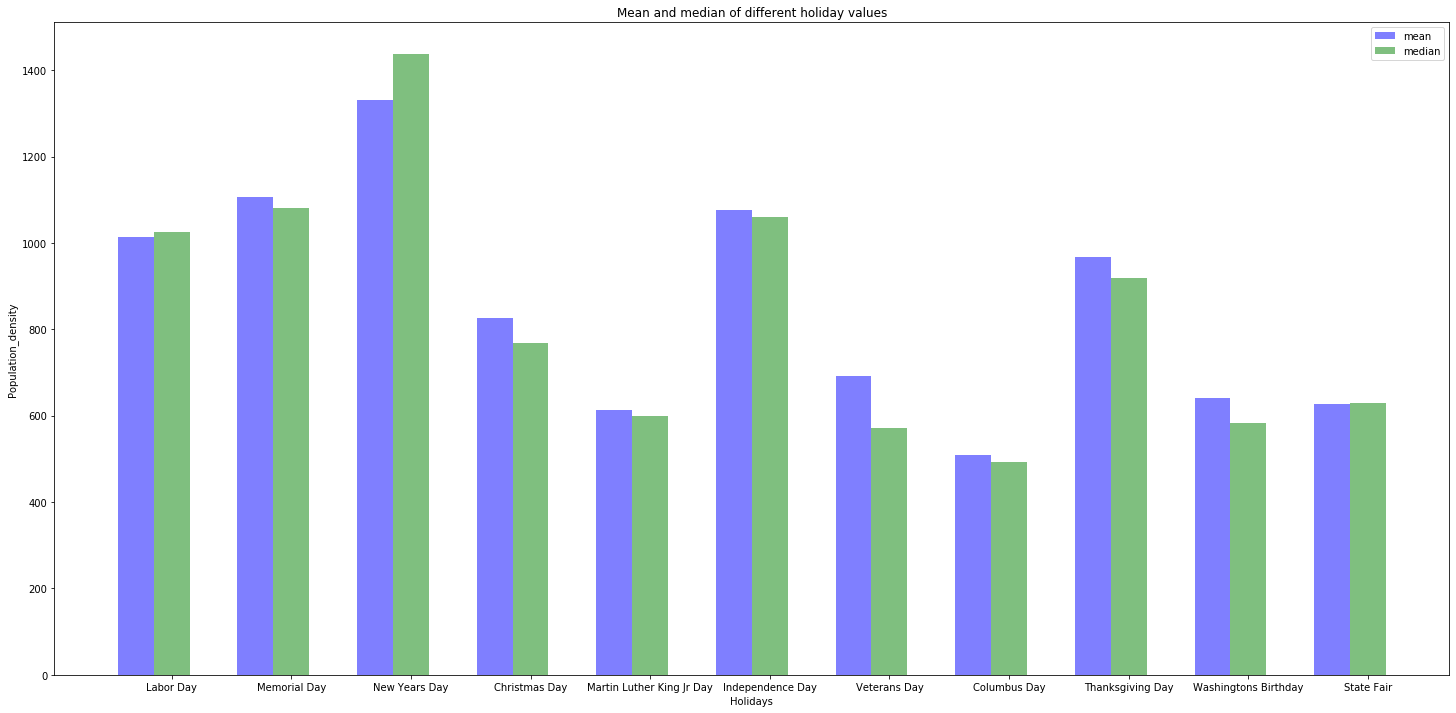

In [5]:
# Your code:
'''
Part - d: Find all the values of 'population_density_categorical.csv' where holiday is not None. Group it categorically, find 
          the mean and median of each group and plot them in a bargraph.
'''
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns 


df = pd.read_csv('population_density_categorical.csv')
df = df[df['holiday'] != 'None']  # Get all the rows from the dataframe where 'holiday' value is not none.
holidays = {}
holiday_loc = df.columns.get_loc('holiday') #Get the index of column 'holiday'
mean_arr = []
median_arr = []
day_arr = []
population_density_loc = df.columns.get_loc('population_density') #Get the index of column 'population_density'
for i in range(len(df.index)):  # Create a dictory where key is holiday category and value is list of values
    holiday_value = df.iloc[i,holiday_loc]
    if holiday_value not in holidays.keys():
        holidays[holiday_value] = []
        holidays[holiday_value].append(df.iloc[i,population_density_loc])
    else:
        x = holidays[holiday_value]
        x.append(df.iloc[i,population_density_loc])
        holidays[holiday_value] = x
count = 0
for day in holidays.keys():     # Get the mean and median array for each holiday category
    x = holidays[day]
    day_arr.append(day)
    count += 1
    mean_arr.append(np.mean(x))
    median_arr.append(np.median(x))
n_groups = count

# create plot
fig, ax = plt.subplots(figsize=(25,12))   
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.5

rects1 = plt.bar(index,mean_arr, bar_width,
alpha=opacity,
color='b',
label='mean')   # Mean bar

rects2 = plt.bar(index + bar_width, median_arr, bar_width,
alpha=opacity,
color='g',
label='median')  # Median bar

plt.xlabel('Holidays')  # set label holiday on X-axis
plt.ylabel('Population_density')  # set label Population_density on Y-axis
plt.title('Mean and median of different holiday values') # set plot title as Mean and median of different holiday values
plt.xticks(index + bar_width, day_arr) 
plt.legend()


plt.show()



   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

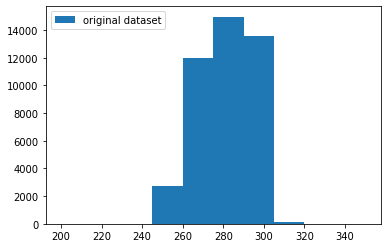

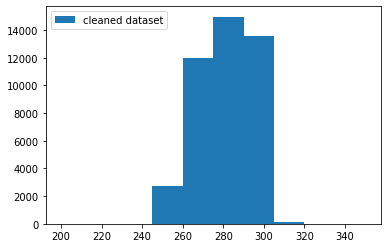

In [6]:
# Your code:
'''
Part - e: Create a graphical distribution of 'temperature' from both the dataset, 'population_density_categorical.csv'
          and 'population_density_categorical_filtered.csv' 
'''
df = pd.read_csv('population_density_categorical.csv')
filter_df = pd.read_csv('population_density_categorical_filter.csv')

plt.hist(df['temperature'], range=[200, 350],label=['original dataset']) #Plot a histogram of the temperature value from both 'original' and 'filtered' dataset
plt.legend(loc='upper left')
plt.show()

plt.hist(filter_df['temperature'], range=[200, 350],label=['cleaned dataset']) #Plot a histogram of the temperature value from 'cleaned' dataset
plt.legend(loc='upper left')
plt.show()



   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.
   
   Explanation: 
   As we can see from the (2D) histogram, the frequency of the data is the highest when the range is 290-295 for      'temperature'and when the range is 4500-5000 for 'poulation_density'.

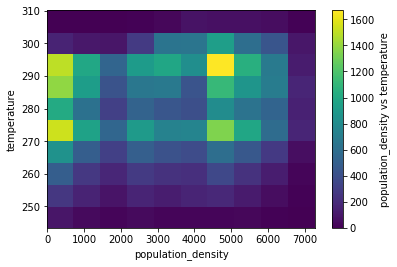

In [7]:
# Your code:
'''
Part - f:  Create a graphical distribution of 'population_density' and 'temperature' together from the filtered dataset.
'''
filter_df = pd.read_csv('population_density_categorical_filter.csv')
plt.hist2d(x=filter_df['population_density'], y=filter_df['temperature']) # Plot a heat map (2-D histogram) using the data
plt.xlabel('population_density')
plt.ylabel('temperature')
cbar = plt.colorbar()
cbar.ax.set_ylabel('population_density vs temperature')
plt.show()


## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [8]:
# Your code:
'''
Part - a: Create a new column 'temperature_categorical' in the filtered dataset and set its value corresponding to the 
          values of upper quartile and low quartile.
'''
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import graphviz 
from sklearn import tree
from subprocess import check_output
from p_decision_tree.DecisionTree import DecisionTree
from os import system

filter_df = pd.read_csv('population_density_categorical_filter.csv')
filter_df['temperature_categorical'] = ''            # Create a new column having no values
temperature_loc = filter_df.columns.get_loc('temperature')
temperature_categorical_loc = filter_df.columns.get_loc('temperature_categorical')
Q1 = filter_df['temperature'].quantile(0.25)        # Find the quartiles (Q1 and Q3)
Q3 = filter_df['temperature'].quantile(0.75)
for i in range(len(filter_df.index)):   # Set the value in 'temperature_categorical' column depending 'temperatue' column
    temperature = filter_df.iloc[i, temperature_loc]
    if temperature >= Q3:
        filter_df.iloc[i, temperature_categorical_loc] = 'high'
    elif temperature <= Q1:
        filter_df.iloc[i, temperature_categorical_loc] = 'low'
    else:
        filter_df.iloc[i, temperature_categorical_loc] = 'medium'
filter_df.to_csv("population_density_categorical_filter.csv", index=False)
print("done")

done


   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [9]:
# Your code:
'''
Part - b: Considering "holiday", "temperature_categorical", and "weather_type" as the descriptive features and 
          "population_density_categorical" as the target feature make a decision tree for 5000 samples.
'''
df_temp = pd.read_csv('population_density_categorical_filter.csv')

columns = df_temp.columns
descriptive_features= columns[[df_temp.columns.get_loc('holiday'),df_temp.columns.get_loc('temperature_categorical'),df_temp.columns.get_loc('weather_type')]]
print("descriptive_features: ")
print(descriptive_features)

label =  columns[df_temp.columns.get_loc('population_density_categorical')]
print(label)
print("\ntarget feature:\n" + label)

for column in columns:
    df_temp[column]= df_temp[column].astype(str)
    
data_descriptive = df_temp[descriptive_features].values
data_label = df_temp[label].values

#Making th decision tree
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")
print('Decision tree')

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,5000)
print('DT')

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree(render=True )

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

# uploaded DecisionTree graph pdf on moodel. The name is visualTree.pdf

descriptive_features: 
Index(['holiday', 'temperature_categorical', 'weather_type'], dtype='object')
population_density_categorical

target feature:
population_density_categorical
Decision tree
DT
System entropy:  2.2308531906631788
System gini:  None


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation: 

For spliting the tree in second round of ID3, the best attribute which is based on entropy is according to the different types of weather such as Drizzle, Mist, Clear, Clouds, Rain, Thunderstorm etc.


## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [10]:
# Your code:
'''
We restrict our dataset to the columns holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time 
and population_density. We also modify our date_time column to hold the value in hour only. We also define 
population_density to be our target feature.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , median_absolute_error

df = pd.read_csv('population_density_categorical_filter.csv')
df['date_time'] = pd.to_datetime(df.date_time).dt.hour #Changing date time values to time(hour) only

df1 = df[['holiday', 'temperature', 'rain_1h','snow_1h','clouds_percentage','date_time','population_density']] 

X = df1[['holiday', 'temperature', 'rain_1h','snow_1h','clouds_percentage','date_time']] #the descriptive features
y = df1['population_density'] #target Feature
print('done')


done


   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation:

holiday,temperature, rain_1h,snow_1h,date_time are suitable for linear regression. Holiday column needs to be modified as linear regression takes only continous variables. So we will apply one hot encoding to convert holiday column to continous. 

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

Explanation:

We have used one hot encoding to convert holiday(categorical) to numerical.

In [11]:
# Your code:
'''
Part:b - Modify the coulmn 'holiday' in order to make it continuous.
'''
df1 = pd.concat([df1, pd.get_dummies(df1['holiday'], prefix='holiday')],axis=1) #one hot encoding for holiday column
df1.drop(['holiday'],axis=1, inplace=True) #removing holiday column to avoid dummy variable trap                                                              
print(df1[:2])


   temperature  rain_1h  snow_1h  clouds_percentage  date_time  \
0       288.42      0.0      0.0                  1          5   
1       277.87      0.0      0.0                 90         23   

   population_density  holiday_Christmas Day  holiday_Columbus Day  \
0                2935                      0                     0   
1                1797                      0                     0   

   holiday_Independence Day  holiday_Labor Day  \
0                         0                  0   
1                         0                  0   

   holiday_Martin Luther King Jr Day  holiday_Memorial Day  \
0                                  0                     0   
1                                  0                     0   

   holiday_New Years Day  holiday_None  holiday_State Fair  \
0                      0             1                   0   
1                      0             1                   0   

   holiday_Thanksgiving Day  holiday_Veterans Day  \
0           

(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

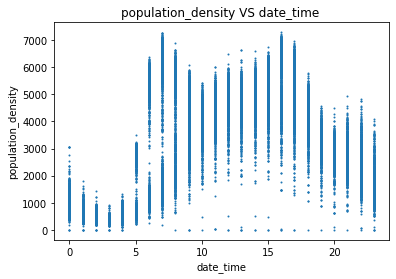

In [12]:
# Your code:
'''
Part: c - Plot 'population_density' vs 'date_time'.
'''
plt.scatter(df['date_time'],df[['population_density']] ,marker = 'o', s = 1)  # make a scatter plot.
plt.xlabel('date_time')       # set label as date_time on X-axis
plt.ylabel('population_density')     # set label as population_density on Y-axis
plt.title('population_density VS date_time ')  # set title of plot as population_density VS date_time
plt.show()


   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [13]:
# Your code:
'''
Part:d - Create 2 distinct datasets using random sampling and first-n sampling alogrithms
'''
n_rows = len(df1.index)
RegA = df1.head(int(n_rows*0.7)) #First-n-sampling (Top Sampling)
RegB = df1.sample(frac=0.7, random_state=403340) #Random sampling
RegA.to_csv('RegA.csv',index=False)
RegB.to_csv('RegB.csv',index=False)


Explanation:

Top Sampling and Random Sampling are the two methods. Since we do not have classes we cannot choose other sampling methods like stratified sampling. Out of these two, random sampling method seems as a better classifier as it samples data randomly. 


   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [14]:
# Your code:
'''
Part:e - Create and train a linear regression classifier based on the two dataset created in the above question.
'''
#TOP Sampling
df_RegA = pd.read_csv('RegA.csv')

features = df_RegA.columns.tolist()
features.remove('population_density') #we use all as descriptive features, but not the target feature
X_A = df_RegA[features]
y_A = df_RegA['population_density']

#Dividing data set into training and test 
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size = 0.2, random_state = 403340)

#Feature scaling and Normalization: As we have different quantities like kelvin,hour etc,to make attributes of 
#same scale and get better results.

masX_train = MaxAbsScaler().fit_transform(X_train_A)
X_train_A = preprocessing.normalize(masX_train)

masX_test = MaxAbsScaler().fit_transform(X_test_A)
X_test_A = preprocessing.normalize(masX_test)

regressor = LinearRegression()  
regressor.fit(X_train_A, y_train_A)

y_pred_A = regressor.predict(X_test_A)
interceptA = regressor.intercept_
slopeA = regressor.coef_

#Random Sampling
df_RegB = pd.read_csv('RegB.csv')

features = df_RegB.columns.tolist()
features.remove('population_density') #we use all descriptive features, but not the target feature
X_B = df_RegB[features]
y_B = df_RegB['population_density']

#Dividing data set into training and test 
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size = 0.2, random_state = 403340)

#Feature scaling and Normalization

masX_train = MaxAbsScaler().fit_transform(X_train_B)
X_train_B = preprocessing.normalize(masX_train)

masX_test = MaxAbsScaler().fit_transform(X_test_B)
X_test_B = preprocessing.normalize(masX_test)

regressor = LinearRegression()  
regressor.fit(X_train_B, y_train_B)

y_pred_B = regressor.predict(X_test_B)
interceptB = regressor.intercept_
slopeB = regressor.coef_

print("done")


done


(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

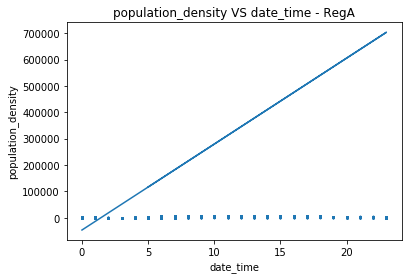

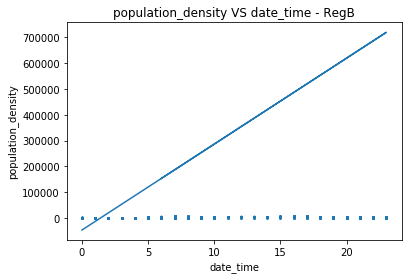

In [15]:
# Your code:
'''
Part:f - Create a plot for each dataset used in above question and visualize the behaviour regression function against 
         each dataset.
'''
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

#visualize original data point
tempA = slopeA[-1] * df_RegA['date_time']
plt.scatter(df_RegA['date_time'], df_RegA['population_density'] ,marker = 'o', s = 1)
plt.plot(df_RegA['date_time'], tempA + interceptA)
plt.xlabel('date_time') 
plt.ylabel('population_density')
plt.title('population_density VS date_time - RegA') 
plt.show()

tempB = slopeB[-1]*df_RegB['date_time']
plt.scatter(df_RegB['date_time'], df_RegB['population_density'] ,marker = 'o', s = 1)
plt.plot(df_RegB['date_time'], tempB + interceptB)
plt.xlabel('date_time') 
plt.ylabel('population_density')
plt.title('population_density VS date_time - RegB') 
plt.show()


   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

Mean squared error: 2367756.06
Mean absolute error: 1237.31
Root Mean Squared Error: 1538.7514622496203
Median absolute error: 1082.61 

Mean squared error: 2228032.74
Mean absolute error: 1212.47
Root Mean Squared Error: 1492.6596204188904
Median absolute error: 1066.89


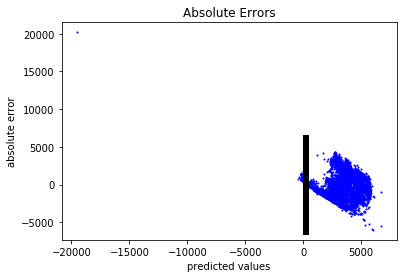

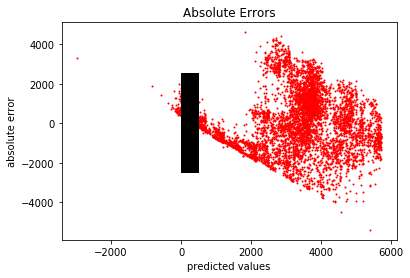

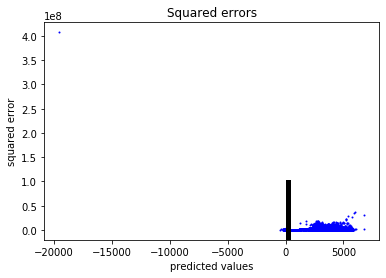

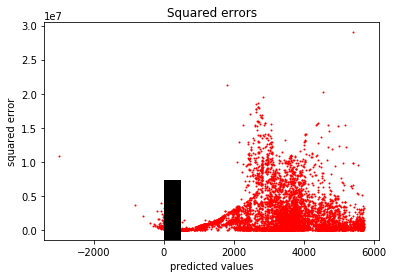

In [16]:
# Your code:
'''
Part:g - Evaluate and print the mean squared error, mean absolute error and median squared error with respect to 
         the original, non-sampled data set and visualize plots showing the errors and squared errors.
'''
#top sampling
print("Mean squared error: %.2f" % mean_squared_error(y_test_A, y_pred_A))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test_A, y_pred_A))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_A, y_pred_A)))
print("Median absolute error: %.2f" % median_absolute_error(y_test_A, y_pred_A),'\n')

#random Sampling
print("Mean squared error: %.2f" % mean_squared_error(y_test_B, y_pred_B))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test_B, y_pred_B))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_B, y_pred_B)))
print("Median absolute error: %.2f" % median_absolute_error(y_test_B, y_pred_B))

#Plot for Top Sampling- Absolute Error
plt.scatter(y_pred_A, (y_test_A - y_pred_A), color = "blue", s = 1) 
plt.title("Absolute Errors")    #set title as Absolute Errors
plt.hlines(y = 0, xmin = 0, xmax = 500, linewidth = 100) 
plt.xlabel('predicted values')   #sel label as predicted values on X-axis
plt.ylabel('absolute error')     #sel label as squared error on Y-axis
plt.show()

#Plot for Random Sampling- Absolute Error
plt.scatter(y_pred_B, (y_test_B - y_pred_B), color = "red", s = 1) 
plt.title("Absolute Errors")     #set title as Absolute Errors
plt.hlines(y = 0, xmin = 0, xmax = 500, linewidth = 100) 
plt.xlabel('predicted values')    #sel label as predicted values on X-axis
plt.ylabel('absolute error')      #sel label as squared error on Y-axis
plt.show()

#Plot for Top Sampling- Squared Errors
plt.scatter(y_pred_A, (y_test_A - y_pred_A) ** 2, color = "blue", s = 1) 
plt.title("Squared errors")     #set title as Squared errors
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 500, linewidth = 100) 
plt.xlabel('predicted values')   #sel label as predicted values on X-axis
plt.ylabel('squared error')       #sel label as squared error on Y-axis
plt.show()

#Plot for Random Sampling- Squared Errors
plt.scatter(y_pred_B, (y_test_B - y_pred_B) ** 2, color = "red", s = 1) 
plt.title("Squared errors")      #set title as Squared errors
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 500, linewidth = 100) 
plt.xlabel('predicted values')    #sel label as predicted values on X-axis
plt.ylabel('squared error')   #sel label as squared error on Y-axis
plt.show()


   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:

Both the models are similar as the data was taken randomly in both scenarios. The only difference was that in top Sampling first N records were taken but in random sampling records were taken randomly. We will recommend Random Sampling as accuracy was better and Median absolute error was less. For increasing the accuracy we can implement PCA to decrease the dimensionality and improve the model.


## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [51]:
# Your code:
'''
Create a new dataframe from original dataframe having the columns holiday, temperature, rain_1h, snow_1h, clouds_percentage, 
date_time and population_density_categorical. Modify the column 'date_time' to contain only hour value.
'population_density_categorical' is the target value and all other features are descriptive.
'''
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df = pd.read_csv('population_density_categorical_filter.csv')
df['date_time'] = pd.to_datetime(df['date_time']).dt.hour # get date_time data into time values only.

#create a new dataframe with columns as mension in question
df2 = df[['holiday', 'temperature', 'rain_1h', 'snow_1h','clouds_percentage','date_time','population_density_categorical']]
features = df2.columns[:-1]
x = df2[features] # descriptive features
y = df2['population_density_categorical'] # traget features
print("done")

done


   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [52]:
# Your code:
'''
Part:a - Create a new dataset which do not contain the column 'clouds_percentage' to improve the accuracy of the model.
'''
df['holiday'] = pd.get_dummies(df['holiday']) 
df2 = df[['holiday', 'temperature', 'rain_1h', 'snow_1h','clouds_percentage','date_time','population_density_categorical']]
x = df2[['holiday','temperature','rain_1h','snow_1h','date_time']]# descriptive features
y = df2['population_density_categorical'] # traget features
print("done")


done


Explanation:

holiday, temperature, rain_1h, snow_1h, date_time are sutaible as an input for SVM because after removing clouds_percentage column we got better accuracy. We tried different combination of input features but that time we got same accuracy. but when we not take clouds_percentage that time accuracy changed.
holiday feature is need to modified first because it has a categorical value so  we use one hot encoding to convert it into numerical data.


   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [53]:
# Your code:
'''
Part:b - Create 2 dataset by diving the orignal dataset into 2 parts svmTrain which is training dataset 
         and svmTest which is test dataset.
'''
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# devide the dataset in SvmTrain and svmTest. We take 80:20 ration for division.
X_Train, X_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2,random_state=403340) #split the dataset in a 80–20 ratio
svmTrain = X_Train.join(y_Train) # merger the tarined descriptive features and target features
svmTest = X_Test.join(y_Test) # merger the tested descriptive features and target features

# Create new dataset svmTrain and svmTest
svmTrain.to_csv("svmTrain.csv", index=False)
svmTest.to_csv("svmTest.csv", index=False)
print("done")


done


Explanation:

We splited dataset in 80:20 ratio. We used 80% dataset for tranning the model and 20% dataset for testing the model. After that we create two new file for tranned and tested dataset.


   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [55]:
# Your code:
'''
Part:c - Using the 2 dataset i.e. the training dataset and test dataset created above, train 3 different SVM models with
         different combinations of the parameters.
'''
from sklearn import metrics
svm_model = svm.SVC(kernel = "linear", C = 1) # Train data with linear kernel. because it take less time to train as compare to other.
svm_model.fit(X_Train,np.ravel(y_Train)) 
y_predict_linear = svm_model.predict(X_Test)

svm_model = svm.SVC(kernel = "rbf", C = 0.1, gamma = "auto") #Train data set with RBF kernel. It give high accuracy as compared to linear and poly. 
svm_model.fit(X_Train,y_Train) 
y_predict_rbf = svm_model.predict(X_Test)

svm_model = svm.SVC(kernel = "poly", C = 10, gamma = "scale", degree = 8 ) # Train data set with RBF kernel
svm_model.fit(X_Train,np.ravel(y_Train))
y_predict_poly = svm_model.predict(X_Test)

print("done")


done


   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [56]:
# Your code:
'''
Part:d - Evaluate the mean mean accurracy and classification report of the trained SVMs with respect to the test set.
'''

# for linear Classification Report
print("Linear kernel: ")
print('Evaluating the decision function: \n', svm_model.decision_function(X_Test), '\n')
print('Accuracy: \n', svm_model.score(X_Test,y_predict_linear), '\n')
print('Classification Report: \n', classification_report(y_Test, y_predict_linear), '\n') 

# for RBF Classification Report
print("RBF kernel: ")
print('Evaluating the decision function: \n', svm_model.decision_function(X_Test), '\n')
print('Accuracy: \n', svm_model.score(X_Test,y_predict_rbf), '\n')
print('Classification Report: \n', classification_report(y_Test, y_predict_rbf), '\n')

# for polynomial Classification Report
print("Polynomial kernel: ")
print('Evaluating the decision function: \n', svm_model.decision_function(X_Test), '\n')
print('Accuracy: \n', svm_model.score(X_Test,y_predict_poly), '\n')
print('Classification Report: \n', classification_report(y_Test, y_predict_poly), '\n') 


Linear kernel: 
Evaluating the decision function: 
 [[ 3.23881265  0.75595846  0.84197085  0.82523461  4.22949503]
 [ 4.24804941  0.89878537  3.26145882  1.84321884 -0.2797614 ]
 [ 4.26760164  0.79064194  3.26876106  2.0831573  -0.29101594]
 ...
 [ 4.27699845  0.75760162  3.26961084  2.16980328 -0.29421315]
 [ 4.27934286  0.75091453  3.26315918  2.14738719 -0.29037839]
 [ 0.75850938  4.27557282  3.2435107  -0.2683011   1.85968898]] 

Accuracy: 
 0.7996541786743516 

Classification Report: 
               precision    recall  f1-score   support

        high       0.61      0.73      0.66      2413
         low       0.42      0.33      0.37      1367
      medium       0.35      0.36      0.36      1575
   very high       0.00      0.00      0.00       862
    very low       0.70      0.88      0.78      2458

    accuracy                           0.57      8675
   macro avg       0.42      0.46      0.43      8675
weighted avg       0.50      0.57      0.53      8675
 

RBF kernel: 


   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:

We use three different SVM kernel like Linear, RBF and polynomial. We can see from result we got good accuracy in RBF and polynomial as compared to linear kernel. Because linear kernel is used for linear hyper-plane. RBF and polynomial kernel is used for non-linear hyper-plane. Our data is non-linear so we got high accuracy result using rbf kernel. We recommend RBF kernel because it give high accuracy as compared to other. 


## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [20]:
# Your code:
'''
Part:a - Create a dataset which could as an input to the neural network.
'''
# It show some warning when we run by using this we ignore the warning
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
import sklearn.metrics as metric

df = pd.read_csv('population_density_categorical.csv')

#getting first 4000 rows
df = df[:4000]
print("Holiday:\n",df['holiday'].value_counts(),'\n') # count number of possible patterns 
print("population_density:\n",df['population_density'].value_counts()) # count number of possible patterns 
df['date_time'] = pd.to_datetime(df.date_time).dt.hour
features = df.columns[:-1] # get descriptive features
X_neural = df[features] 
Y_neural = df['population_density_categorical'] #target feature

Holiday:
 None         3998
Labor Day       2
Name: holiday, dtype: int64 

population_density:
 356     7
4442    6
367     6
375     5
304     5
4524    5
409     5
313     5
346     5
369     5
382     5
648     5
4702    5
368     5
381     5
391     5
338     5
2903    5
334     4
322     4
811     4
588     4
666     4
4760    4
420     4
5823    4
4547    4
373     4
4454    4
5083    4
       ..
4513    1
4511    1
2460    1
6552    1
407     1
2452    1
4772    1
397     1
2442    1
4489    1
1193    1
425     1
4341    1
4525    1
2494    1
2504    1
455     1
2502    1
2500    1
6594    1
2897    1
443     1
2478    1
479     1
2486    1
2180    1
2484    1
433     1
2480    1
0       1
Name: population_density, Length: 2855, dtype: int64


Explanation:

Possible extracted features: holiday, temperature, rain_1h, snow_1h,clouds_percentage,date_time and population_density. In our extracted features we have two categorical data(holiday and population_density). So we have two input patterns for holiday feature and 2855 inputs patterns for population_density feature.

   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:

Yes we think that neural network provides an accurate result. we can see from dataset information we have different type of data i.e float64, int64 and object in our dataset. So it is non-linear dataset. Neural network perform better on non-linear dataset. Neural network perfom good on both categorical or numerical dataset. 

In [21]:
# Your code:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
holiday                           4000 non-null object
temperature                       4000 non-null float64
rain_1h                           4000 non-null float64
snow_1h                           4000 non-null float64
clouds_percentage                 4000 non-null int64
weather_type                      4000 non-null object
weather_type_details              4000 non-null object
date_time                         4000 non-null int64
population_density                4000 non-null int64
population_density_categorical    4000 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 312.6+ KB
None


   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:

holiday, weather_type, weather_type_details need to be converted to numerical data as Neural Network works with numerical and binary data only. Moreover we have normalized the data since the large magnitudes of the some data like population_density relative to the temperature,snow_1h data would make the neural network training process more difficult than with normalized data, because changes to the population_density would have a much greater effect than changes to the temperature,snow_1h.

In [22]:
# Your code:
'''
Part:c - Change the categorical features into continuous ones and remove the original columns afterwards.
'''
X_neural = pd.concat([X_neural, pd.get_dummies(X_neural['holiday'], prefix='holiday')],axis=1)
X_neural = pd.concat([X_neural, pd.get_dummies(X_neural['weather_type'], prefix='weather_type')],axis=1)
X_neural = pd.concat([X_neural, pd.get_dummies(X_neural['weather_type_details'], prefix='weather_type_details')],axis=1)
X_neural.drop(['holiday','weather_type','weather_type_details'],axis=1, inplace=True)


   (d) Train your network with default hyperparameters and return the parameters.

In [23]:
'''
Part:d - Train the neural network with the default hyperparameters. After training, we return the parameters. we split dataset
         in 50:50 ratio. We uesd 50% dataset for tranning and 50% dataset for testing model.
'''
X_train, X_test, y_train, y_test = train_test_split(X_neural,Y_neural,test_size=0.5,random_state=403340)

#normalization 
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

nn = MLPClassifier()
a = nn.fit(X_train,y_train)
y_pred=nn.predict(X_test)
nn.score(X_test,y_test)
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('accuracy=',accuracy)                         # show accuracy score

print([coef.shape for coef in nn.coefs_])  # size of synapsis weights
len(nn.coefs_) 



accuracy= 0.812
[(50, 100), (100, 5)]


2

   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [24]:
# Your code: (number of hidden layers)
'''
Part:e - Find the optimized number of hidden layers and the optimized number of nodes.
'''
nerual_model = MLPClassifier(hidden_layer_sizes=(20,20,)) #2 hidden layers increases accuracy and may result in overfitting
a = nerual_model.fit(X_train,y_train)
y_pred=nerual_model.predict(X_test)
nerual_model.score(X_test,y_test)
#y_true = y_train
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('accuracy=',accuracy)                         # show accuracy score


print([coef.shape for coef in nerual_model.coefs_],'\n')  # size of synapsis weights
len(nerual_model.coefs_) 

nerual_model = MLPClassifier(hidden_layer_sizes=(150,))#1 hidden layer with 150 nodes increases accuracy
a = nerual_model.fit(X_train,y_train)
y_pred=nerual_model.predict(X_test)
nerual_model.score(X_test,y_test)
#y_true = y_train
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('accuracy=',accuracy) 
print([coef.shape for coef in nerual_model.coefs_],'\n')  # size of synapsis weights
len(nerual_model.coefs_) 

accuracy= 0.8775
[(50, 20), (20, 20), (20, 5)] 

accuracy= 0.833
[(50, 150), (150, 5)] 



2

In [29]:
# Your code: (number of nodes in the hidden layer)

nerual_model = MLPClassifier(hidden_layer_sizes=(120,))#1 hidden layer with 170 nodes increases accuracy
a = nerual_model.fit(X_train,y_train)
y_pred=nerual_model.predict(X_test)
nerual_model.score(X_test,y_test)
#y_true = y_train
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('accuracy=',accuracy) 
print([coef.shape for coef in nerual_model.coefs_],'\n')  # size of synapsis weights
len(nerual_model.coefs_) 

accuracy= 0.8145
[(50, 120), (120, 5)] 



2

In [28]:
# Your code: (optimized network) 
nerual_model = MLPClassifier(hidden_layer_sizes=(25,))#1 hidden layer with 25 nodes
a = nerual_model.fit(X_train,y_train)
y_pred=nerual_model.predict(X_test)
nerual_model.score(X_test,y_test)
#y_true = y_train
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('accuracy=',accuracy)                         # show accuracy score
print([coef.shape for coef in nerual_model.coefs_])  # size of synapsis weights
len(nerual_model.coefs_) 


accuracy= 0.72
[(50, 25), (25, 5)]


2

Explanation:
We tried running a neural network model having 1 hidden layer with 150 nodes and 2 hidden layers with 20 nodes. We found the model with 2 hidden layers with 20 nodes to be more accurate.


   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [30]:
# Your code: (linear activation function):
'''
Part:f - Train the neural network model with one linear activation function and one non-linear activation function using the default number of hidden layers and nodes.
'''
nerual_network = MLPClassifier(activation='identity')
a = nerual_network.fit(X_train,y_train)
y_pred=nerual_network.predict(X_test)
nerual_network.score(X_test,y_test)
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('accuracy=',accuracy)                         # show accuracy score

print([coef.shape for coef in nerual_network.coefs_])  # size of synapsis weights
len(nerual_network.coefs_) 

accuracy= 0.8265
[(50, 100), (100, 5)]


2

In [31]:
# Your code: (non-linear activation function):
'''
code for non-linear activation function. We used 'tanh' non-linear activation function.
'''

nerual_network = MLPClassifier(activation='tanh', hidden_layer_sizes=(25,))
a = nerual_network.fit(X_train,y_train)
y_pred=nerual_network.predict(X_test)
nerual_network.score(X_test,y_test)
accuracy=metric.accuracy_score(np.array(y_test).flatten(), np.array(y_pred).flatten(), normalize=True)
print('accuracy=',accuracy)                         # show accuracy score


print([coef.shape for coef in nerual_network.coefs_])  # size of synapsis weights
len(nerual_network.coefs_) 

accuracy= 0.7765
[(50, 25), (25, 5)]


2

Explanation:

We have used identity as linear activation function and tanh for nonlinear activation.
Identity is an linear activation function and it may result in overfitting. Moreover in linear, it is not possible to do back propagation, also linear activation function turns the neural network into just one layer no matter how many layers we provide. 
Tanh is an nonlinear activation function and it allows backpropagation because they have a derivative function which is related to the inputs.It is zero centered, making it easier to model inputs that have strongly negative, neutral, and strongly positive values.


## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [2]:
# Your code for the confusion matrices on the training data
'''
Part-a: With the help of Kfold cross validation divide dataset into 3 different set. Find the confusion matrix 
        on the test data
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier


df = pd.read_csv('population_density_categorical_filter.csv')
df = df.drop(['weather_type','weather_type_details'], axis = 1) # remove weather_type and weather_type_details from dataset
df['holiday'] = pd.get_dummies(df['holiday']) 

# convert population_density_categorical in numerical format
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
genre_labels = gle.fit_transform(df['population_density_categorical'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

df['population_density_categorical'] = genre_labels # Store numerical value in population_density_categorical column
df['date_time'] = pd.to_datetime(df.date_time).dt.hour # Get the date_time in time(hour) format

X_E = np.array(df.iloc[:,0:7]) # descriptive features
Y_E = np.array(df['population_density_categorical']) # target feature

# with the help of StratifiedKFold cross validation divide dataset in 3 different sets
Kfold = StratifiedKFold(n_splits=3, random_state = 403340, shuffle=True)

for train, test in Kfold.split(X_E,Y_E,groups=None):
    print("TRAIN:", train, "TEST:", test)
    X_train_E, X_test_E = X_E[train], X_E[test]    # get descriptive features train and test dataset
    y_train_E, y_test_E = Y_E[train], Y_E[test]    # get target feature train and train datset
    
#print the shape of train and test dataset    
print(X_train_E.shape) 
y_train_E = np.ravel(y_train_E)
print(np.ravel(y_train_E).shape)


# create confusion_matrix using SVM model with polynomial kernel on Train Data    
svm_model = svm.SVC(kernel = "poly", C = 10, gamma = "scale",degree=8) 
svm_model.fit(X_train_E,y_train_E)
y_predict_rbf = svm_model.predict(X_train_E)
pred_y = np.array(y_predict_rbf)
true_y = np.array(y_train_E)
print("confusion Matrix_SVM: ")
print(pd.crosstab(np.array(true_y), np.array(pred_y), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

# create confusion_matrix on Train Data using neural network with MLPClassifier
nerual_model = MLPClassifier(hidden_layer_sizes=(25,)) #1 hidden layer with 25 nodes
a = nerual_model.fit(X_train_E,y_train_E)
y_pred = nerual_model.predict(X_train_E)
pred_y = np.array(y_pred)
true_y = np.array(y_train_E)
print("confusion Matrix_Neural for MLPClassifier: ")
print(pd.crosstab(np.array(true_y), np.array(pred_y), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

# create confusion_matrix on Train Data for using neural network with MLPClassifier using linear function
nerual_network = MLPClassifier(activation='identity')
nerual_network = nerual_network.fit(X_train_E,y_train_E)
y_pred_nerual = nerual_network.predict(X_train_E)
pred_y = np.array(y_pred_nerual)
true_y = np.array(y_train_E)
print("confusion Matrix_Neural_linear_function: ")
print(pd.crosstab(np.array(true_y), np.array(pred_y), rownames=['True'], colnames=['Predicted'], margins=True),'\n')


TRAIN: [    1     2     3 ... 43371 43372 43373] TEST: [    0     9    12 ... 43357 43363 43374]
TRAIN: [    0     2     3 ... 43371 43372 43374] TEST: [    1     4     7 ... 43367 43370 43373]
TRAIN: [    0     1     4 ... 43370 43373 43374] TEST: [    2     3     5 ... 43369 43371 43372]
(28918, 7)
(28918,)
confusion Matrix_SVM: 
Predicted     0     1     2     3     4    All
True                                          
0          8098     0     2     0     0   8100
1             0  3386     0     0  1156   4542
2             0    14  5482     0     0   5496
3             0     0     0  2861     0   2861
4             0     0     0     0  7919   7919
All        8098  3400  5484  2861  9075  28918 

confusion Matrix_Neural for MLPClassifier: 
Predicted     0     1     2     3     4    All
True                                          
0          7915     0    60   125     0   8100
1             0  4221   293     0    28   4542
2           892   271  4333     0     0   5496
3        

- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [3]:
# Your code for the confusion matrices on the test data
'''
Find the confusion matrix on the test data
''' 
print(X_test_E.shape)
y_test_E = np.ravel(y_test_E)
print(y_test_E.shape)

# create confusion_matrix using SVM model with polynomial kernel on test Data
svm_model = svm.SVC(kernel = "poly", C = 10, gamma = "scale",degree=8) 
svm_model.fit(X_test_E,y_test_E)
y_predict_rbf = svm_model.predict(X_test_E)
pred_y = np.array(y_predict_rbf)
true_y = np.array(y_test_E)
print("confusion Matrix_SVM: \n ")
print(pd.crosstab(np.array(true_y), np.array(pred_y), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

# create confusion_matrix on Train Data using neural network with MLPClassifier
nerual_model = MLPClassifier(hidden_layer_sizes=(20,)) #1 hidden layer with 25 nodes
a = nerual_model.fit(X_test_E,y_test_E)
y_pred = nerual_model.predict(X_test_E)
pred_y = np.array(y_pred)
true_y = np.array(y_test_E)
print("confusion Matrix_Neural_5C: ")
print(pd.crosstab(np.array(true_y), np.array(pred_y), rownames=['True'], colnames=['Predicted'], margins=True),'\n')

# create confusion_matrix on Train Data for using neural network with MLPClassifier using linear function
nerual_network = nerual_network.fit(X_test_E,y_test_E)
y_pred_nerual = nerual_network.predict(X_test_E)
pred_y = np.array(y_pred_nerual)
true_y = np.array(y_test_E)
print("confusion Matrix_Neural_5F: ")
print(pd.crosstab(np.array(true_y), np.array(pred_y), rownames=['True'], colnames=['Predicted'], margins=True),'\n')



(14457, 7)
(14457,)
confusion Matrix_SVM: 
 
Predicted     0     1     2     3     4    All
True                                          
0          4047     0     2     1     0   4050
1             0  1587     0     0   683   2270
2             2     6  2740     0     0   2748
3             0     0     0  1430     0   1430
4             0     0     0     0  3959   3959
All        4049  1593  2742  1431  4642  14457 

confusion Matrix_Neural_5C: 
Predicted     0     1     2     3     4    All
True                                          
0          3435     0    48   567     0   4050
1             0  2204    59     0     7   2270
2           460   311  1977     0     0   2748
3            17     0     0  1413     0   1430
4             0    78     0     0  3881   3959
All        3912  2593  2084  1980  3888  14457 

confusion Matrix_Neural_5F: 
Predicted     0    1     2     3     4    All
True                                         
0          3805    0    72   173     0   4050
1  

- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [4]:
# Your code for precision, recall and F1-scores on the test data
'''
We apply precision, recall and F1-scores on the test data and provide the result for each folds.
'''
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print("SVM accuracy: ",precision_score(y_test_E, y_predict_rbf, average=None))
print("SVM accuracy: ",recall_score(y_test_E, y_predict_rbf, average=None))
print("SVM accuracy: ",f1_score(y_test_E, y_predict_rbf, average=None), '\n')

print("Neural 5e: ",precision_score(y_test_E, y_pred, average=None))
print("Neural 5e: ",recall_score(y_test_E, y_pred, average=None))
print("Neural 5e: ",f1_score(y_test_E, y_pred, average=None), '\n')

print("Neural 5f:",precision_score(y_test_E, y_pred_nerual, average=None))
print("Neural 5f:",recall_score(y_test_E, y_pred_nerual, average=None))
print("Neural 5f:",f1_score(y_test_E, y_pred_nerual, average=None), '\n')



SVM accuracy:  [0.99950605 0.99623352 0.99927061 0.99930119 0.85286514]
SVM accuracy:  [0.99925926 0.69911894 0.99708879 1.         1.        ]
SVM accuracy:  [0.99938264 0.82164121 0.99817851 0.99965047 0.92059063] 

Neural 5e:  [0.87806748 0.84998072 0.94865643 0.71363636 0.99819959]
Neural 5e:  [0.84814815 0.97092511 0.71943231 0.98811189 0.98029806]
Neural 5e:  [0.86284853 0.90643636 0.8182947  0.828739   0.98916783] 

Neural 5f: [0.85046938 1.         0.69167644 0.86913767 0.93109125]
Neural 5f: [0.93950617 0.43920705 0.8588064  0.8034965  1.        ]
Neural 5f: [0.89277335 0.61034588 0.76623377 0.83502907 0.96431616] 



- Accuracy scores on training and test data (give explicitly the result for each fold)

In [8]:
# Your code for accuracy scores on training and test data
'''
We evalute and print the accuracy score on training and test data.
'''

y_predict_rbf = svm_model.predict(X_train_E)
print("SVM_TRAIN accuracy: ",accuracy_score(y_train_E, y_predict_rbf)) # accuracy scores on training data
y_predict_rbf = svm_model.predict(X_test_E)
print("SVM_TEST accuracy: ",accuracy_score(y_test_E, y_predict_rbf),'\n') # accuracy scores on test data

y_pred = nerual_model.predict(X_train_E)
print("Neural_Train 5e: ",accuracy_score(y_train_E, y_pred)) # accuracy scores on training data
y_pred = nerual_model.predict(X_test_E)
print("Neural_Test 5e: ",accuracy_score(y_test_E, y_pred),'\n') # accuracy scores on test data

y_pred_nerual = nerual_network.predict(X_train_E)
print("Neural_Train 5f:",accuracy_score(y_train_E, y_pred_nerual)) # accuracy scores on training data
y_pred_nerual = nerual_network.predict(X_test_E)
print("Neural_Test 5f:",accuracy_score(y_test_E, y_pred_nerual)) # accuracy scores on test data


SVM_TRAIN accuracy:  0.9500311224842658
SVM_TEST accuracy:  0.9519955730787854 

Neural_Train 5e:  0.8952209696382876
Neural_Test 5e:  0.8929930137649581 

Neural_Train 5f: 0.8509924614427
Neural_Test 5f: 0.8487238016185931


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:
Neural network is best model in our opinion. We can see from result we got the accuracy of train data and test data is comparitively higher in neural model. Because it support non-linear dataset and our dataset is non-linear. 

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:
Yes, linear regression model suffers from underfiting. As we find the 'mean sqaured error' of the linear regression model, that time its value decreases with decrease in the training dataset and its value increases with increase in traing dataset. So, this indicate that the linear regression model suffers from underfiting.

   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:

Cross-validation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and we want to estimate how accurately a predictive model will perform in practice. For example, performing K-folds cross-validation loops through all the data and gets classification accuracy for each time, they are then averaged to give a number more representative of overall accuracy. 

Advantages of cross-validation:
1) We can get more accurate estimate of out-of-sample accuracy. 
2) We can make more efficient use of data as every observation is used for both training and testing. 
3) It is simpler to examine the detailed results of the testing process.

Disadvantages of cross-validation: 
1) The disadvantage of K-folds cross-validation method is that the training algorithm has to be rerun from scratch k times,        which means it takes k times as much computation to make an evaluation. 
2) The models with more accurate assumptions may make worse out-of-sample predictions.
